<a href="https://colab.research.google.com/github/sajidkhan-ai/decision-trees/blob/main/Decision_Tree_HyperParameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic : Decision Tree Classifier**
# **Experimentation with Different Hyperparameters**

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
df = pd.read_csv('/content/titanic_dataset.csv')

# **Understanding The Data**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Data Preprocessing**

#Now we will do some rquired preprocessing steps.

# **Data Cleaning**

In [ ]:
df.isnull().sum()/len(df) * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


# **Handling Missing Values**

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

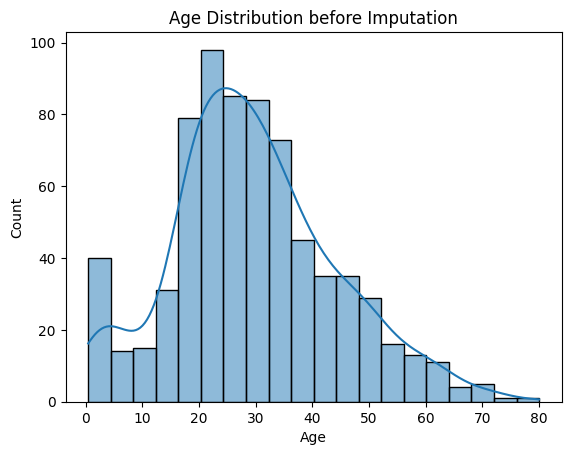

In [ ]:
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution before Imputation')
plt.show()

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


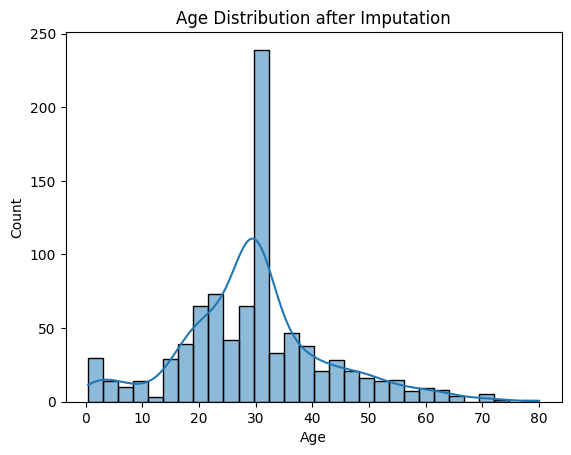

In [ ]:
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution after Imputation')
plt.show()

In [ ]:
df.dropna(subset=['Embarked'], inplace=True)

In [ ]:
df.count()

,0
PassengerId,889
Survived,889
Pclass,889
Name,889
Sex,889
Age,889
SibSp,889
Parch,889
Ticket,889
Fare,889


# **Handling Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

# **Removing Irrelevent Column**

In [ ]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# **Selecting Target Variable**

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# **Splitting Data into Training and Testing set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Transformation**
# **Handling Categorical Variables**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# 1. Initialize encoder with sparse=False to get a dense array (not sparse matrix)
ohe = OneHotEncoder(sparse_output=False, dtype=np.int32)

# 2. Fit only on the categorical columns
ohe.fit(X_train[['Sex', 'Embarked']])

X_train_encoded = ohe.transform(X_train[['Sex', 'Embarked']])
X_test_encoded = ohe.transform(X_test[['Sex', 'Embarked']])

# Get feature names from the encoder
ohe_columns = ohe.get_feature_names_out(['Sex', 'Embarked'])

# Convert to DataFrame with those column names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe_columns, index=X_test.index)

# Drop the original 'fuel' and 'owner' columns from x_train
x_train_final = pd.concat([X_train.drop(['Sex', 'Embarked'], axis=1), X_train_encoded_df], axis=1)

# Same for x_test
x_test_final = pd.concat([X_test.drop(['Sex', 'Embarked'], axis=1), X_test_encoded_df], axis=1)

In [ ]:
x_train_final.head(), x_test_final.head()

(     Pclass        Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
 708       1  22.000000      0      0  151.5500           1         0   
 240       3  29.699118      1      0   14.4542           1         0   
 382       3  32.000000      0      0    7.9250           0         1   
 792       3  29.699118      8      2   69.5500           1         0   
 683       3  14.000000      5      2   46.9000           0         1   
 
      Embarked_C  Embarked_Q  Embarked_S  
 708           0           0           1  
 240           1           0           0  
 382           0           0           1  
 792           0           0           1  
 683           0           0           1  ,
      Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
 281       3  28.0      0      0    7.8542           0         1           0   
 435       1  14.0      1      2  120.0000           1         0           0   
 39        3  14.0      1      0   11.2417           1       

# **Training a Model Using Decision Tree Classifier**

# **Prepruning**

In [ ]:
#Prepruning
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2']
}

# **Import GridSearchCV for Finding the Best HyperParameters Values**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
grid = GridSearchCV(tree_model, param_grid=parameters, cv=5, scoring='accuracy')
grid.fit(x_train_final, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

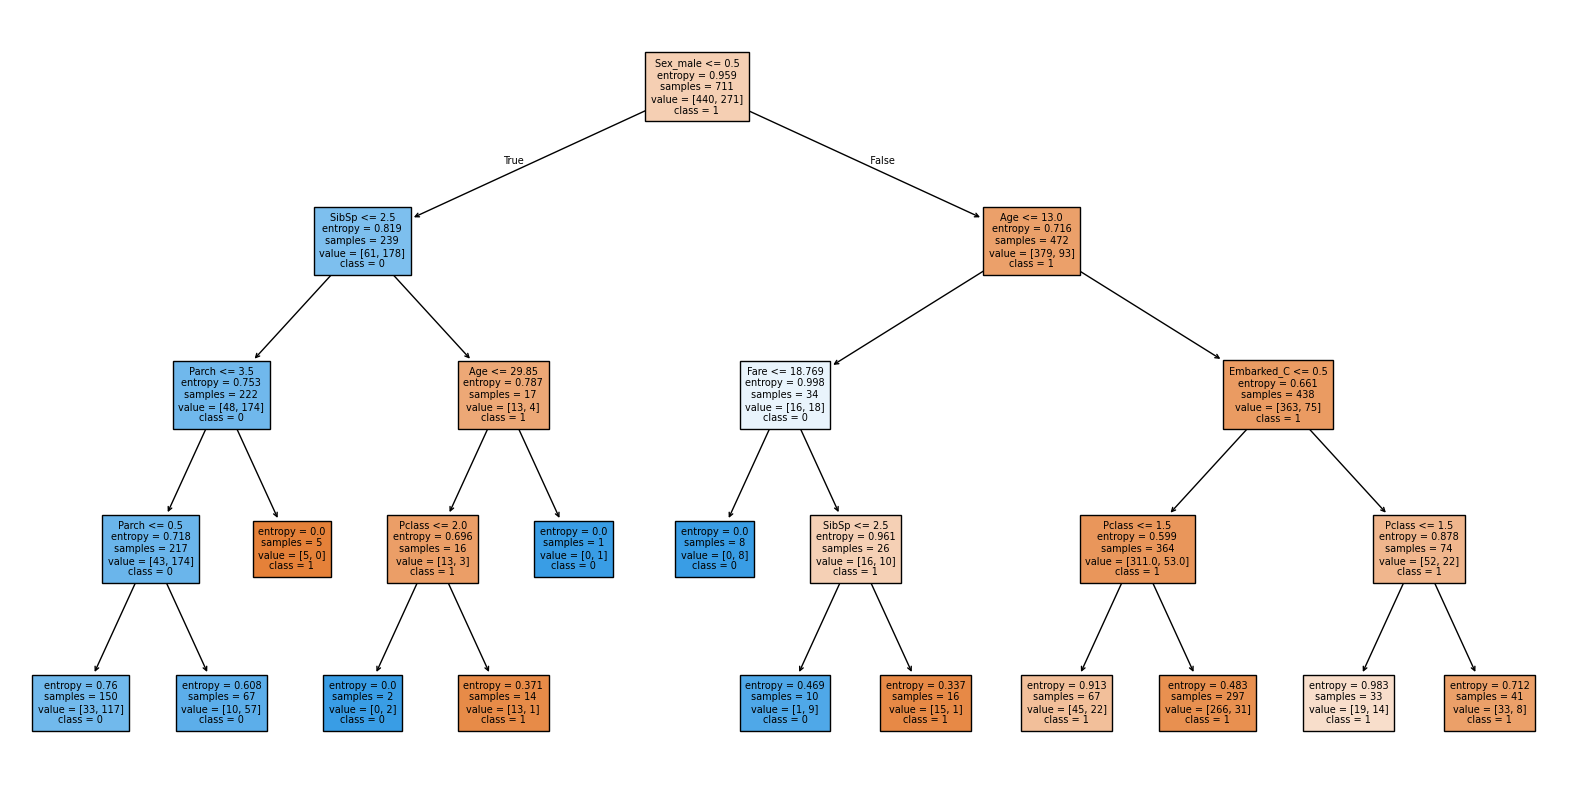

In [ ]:
from sklearn import tree

# Best estimator after GridSearchCV
best_tree = grid.best_estimator_

plt.figure(figsize=(20,10))
tree.plot_tree(
    best_tree,
    fontsize=7,
    filled=True,
    feature_names=x_train_final.columns,   # add feature names
    class_names=[str(cls) for cls in y_train.unique()] # add class labels
)
plt.show()

# **Model Testing**

In [ ]:
y_pred = grid.predict(x_test_final)

# **Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8202247191011236